## Notebook examining proteins listed in this paper as indicators of G2/M phase

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5650473/

#### Listed Proteins

CDC20, AURKA, KIFC1, CCNB1, ANLN, HMMR, KIF20A, AURKB, CCNB2, RRM2, PLK1, RACGAP1, CENPF and PRC1

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt

import cptac
import cptac.utils as ut

en = cptac.Endometrial()

#### Specify Mutation Gene, Create List of Proteins

In [2]:
mut_gene = 'TP53'
prots = ['CDC20','AURKA','KIFC1','CCNB1','ANLN','HMMR','KIF20A','AURKB','CCNB2','RRM2','PLK1','RACGAP1','CENPF','PRC1']

#### Compare proteomics of the listed proteins with TP53 Mutation

In [3]:
#Join TP53 Mutations to proteomic data for given proteins
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_genes=prots, omics_df_name='proteomics')

#Keep only Tumor Samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'
        
#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df.head()

Name,CDC20_proteomics,AURKA_proteomics,KIFC1_proteomics,CCNB1_proteomics,ANLN_proteomics,HMMR_proteomics,KIF20A_proteomics,AURKB_proteomics,CCNB2_proteomics,RRM2_proteomics,PLK1_proteomics,RACGAP1_proteomics,CENPF_proteomics,PRC1_proteomics,TP53_Mutation_Binary
Sample_ID,,,,,,,,,,,,,,,
S001,0.5460,NaN,0.0413,1.2900,0.6950,-0.298,0.6840,NaN,0.921,0.799,0.29500,0.299,0.599,0.3270,Mutated
S002,0.0504,0.311,0.4150,1.0800,0.5750,0.280,0.7000,0.4560,0.392,1.210,1.01000,2.310,0.570,1.4900,Wildtype
S003,0.2370,NaN,-0.5360,0.5510,0.0534,0.120,0.0682,-0.0623,-0.477,0.000,0.30100,-0.193,0.138,-0.6590,Wildtype
S005,-0.3950,-0.798,-0.3750,-0.0836,-0.4880,-0.266,-0.0106,-0.2020,-0.146,-0.108,-0.00057,0.322,-0.284,0.0826,Wildtype
S006,1.5700,3.110,1.2800,1.7400,2.6900,2.320,0.9840,1.0900,1.230,2.880,2.46000,0.402,1.400,0.5380,Mutated


#### Determine significant comparisons when adjusting for multiple testing

In [4]:
comp_cols = list(prot_df.columns)
comp_cols.remove(mut_gene+'_Mutation_Binary')
results = ut.wrap_ttest(df=prot_df, label_column=mut_gene+'_Mutation_Binary', comparison_columns=comp_cols, verbose=True)

CDC20_proteomics :  0.0004645795199681593
AURKA_proteomics :  1.5834367365528105e-05
KIFC1_proteomics :  1.7527596097285096e-06
CCNB1_proteomics :  1.5034287218484184e-05
ANLN_proteomics :  2.853150351659287e-05
HMMR_proteomics :  0.12125378036842688
KIF20A_proteomics :  0.0003638185428331852
AURKB_proteomics :  0.00011387200579958794
CCNB2_proteomics :  0.002128978050931532
RRM2_proteomics :  0.0003317159100058077
PLK1_proteomics :  3.918862049831703e-05
RACGAP1_proteomics :  0.42992502145109
CENPF_proteomics :  0.00011353226992534302
PRC1_proteomics :  0.09391207805655406
11 significant comparisons!


#### Show results that were statistically significant

In [5]:
results

,Comparison,P_Value
0,KIFC1_proteomics,0.000002
1,CCNB1_proteomics,0.000015
2,AURKA_proteomics,0.000016
3,ANLN_proteomics,0.000029
4,PLK1_proteomics,0.000039
5,CENPF_proteomics,0.000114
6,AURKB_proteomics,0.000114
7,RRM2_proteomics,0.000332
8,KIF20A_proteomics,0.000364
9,CDC20_proteomics,0.000465


#### Generate plot of these proteins

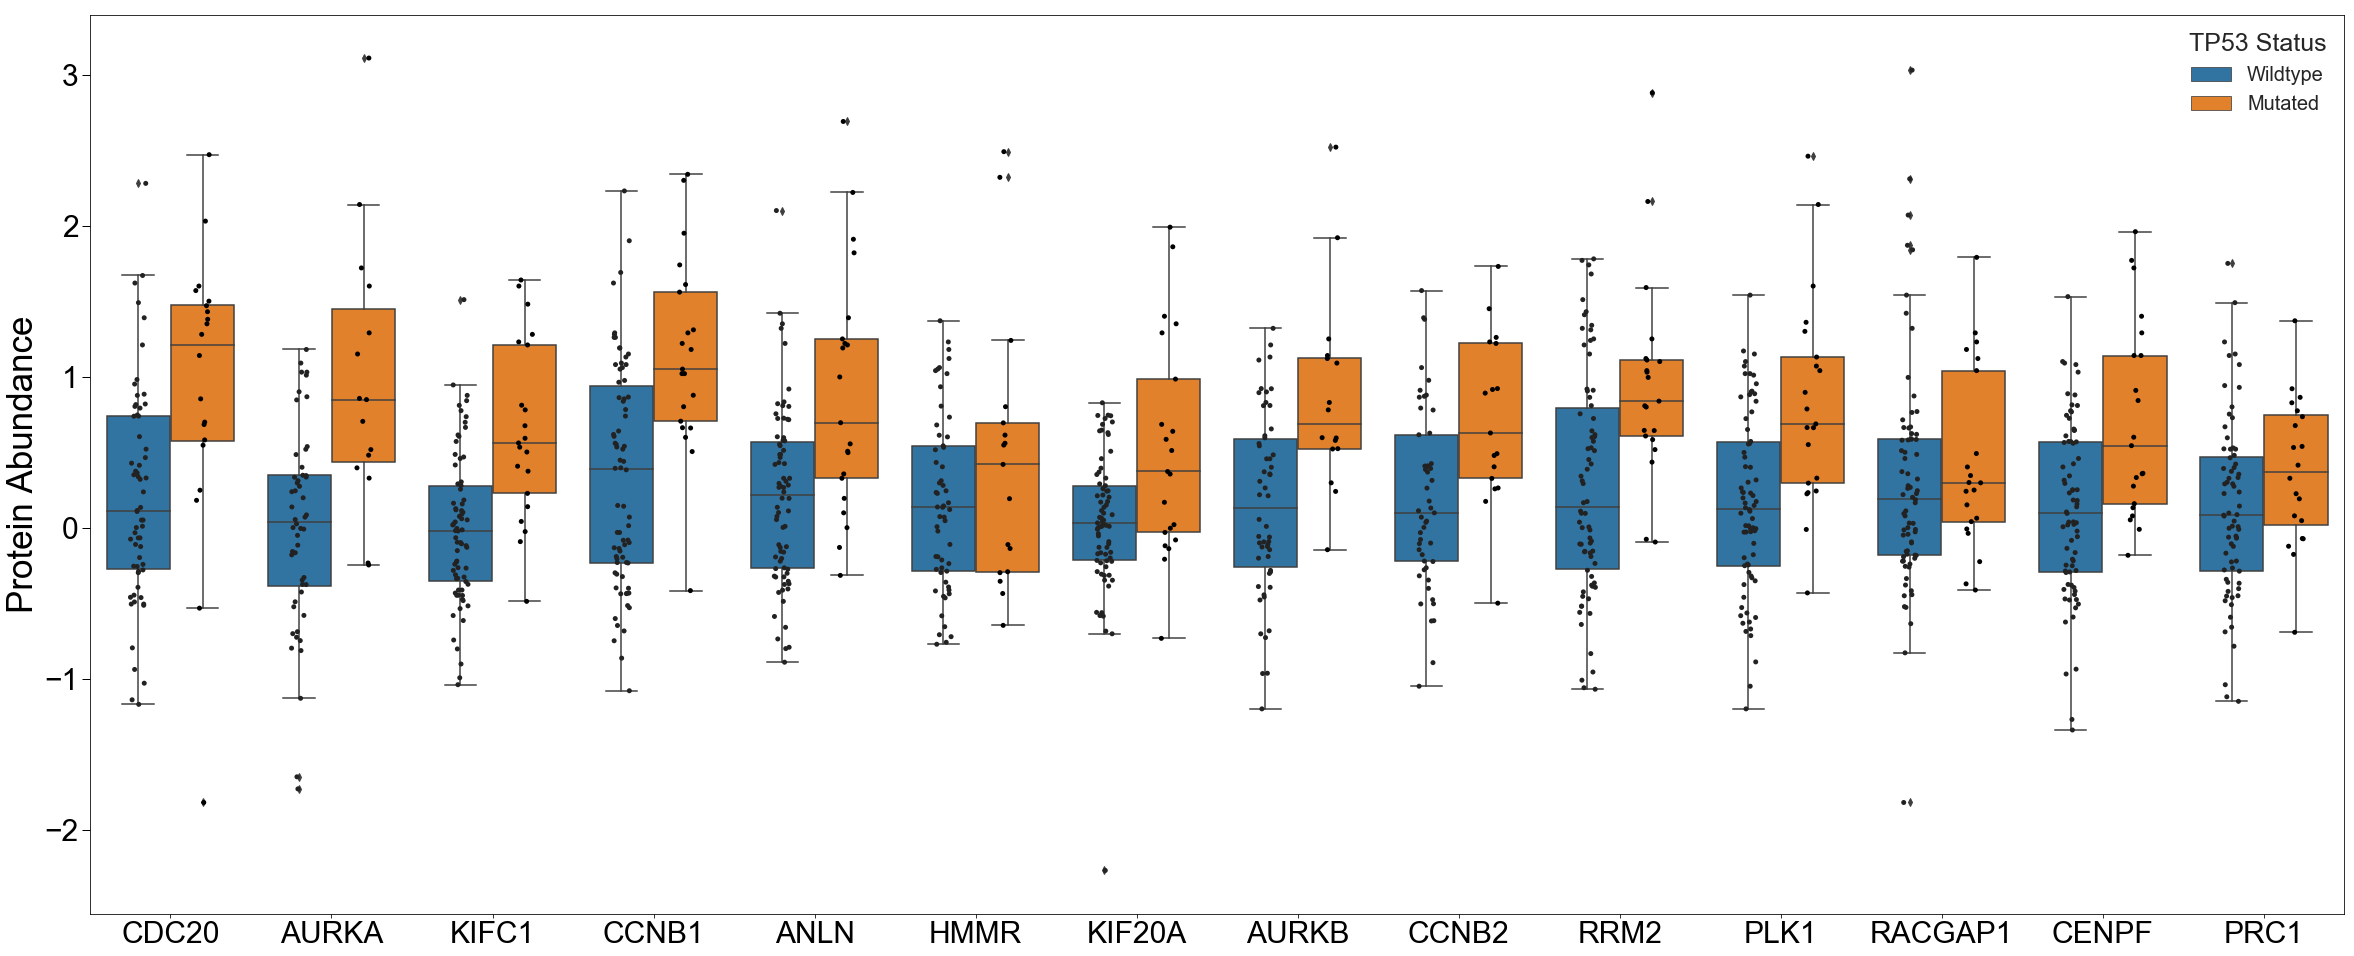

In [6]:
#Specify dimensions and settings
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
plotdf = pd.melt(prot_df, id_vars=['TP53_Mutation_Binary'], value_vars=comp_cols)
plotdf = plotdf.replace(to_replace=r'_proteomics', value='', regex=True)
my_pal = {"Wildtype": "blue", "Mutated": "orange"}

#Make boxplot
plot = sns.boxplot(data=plotdf, y='value', x='Name',hue='TP53_Mutation_Binary', hue_order=['Wildtype','Mutated'])

#Overlay stripplot
plot = sns.stripplot(data=plotdf, y='value', x='Name',hue='TP53_Mutation_Binary', hue_order=['Wildtype','Mutated'], dodge=True, jitter=True, color='black')

#Change Style and label sizes
plot.tick_params(labelsize=30, length=8.0, width=1.0, color='black', axis='y', right=False, reset=True)
plot.tick_params(labelsize=30, axis='x')
plot.set_xlabel('')
plot.set_ylabel('Protein Abundance', fontsize='35')
#plot.set_title('Proteomic abundance of 14 proteins known to be high during M phase vs. TP53 mutation status in Endometrial Cancer', fontsize = '35')
sns.set_style("white")

#Adjust the Legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2],['Wildtype','Mutated'], title='TP53 Status', fontsize='20', frameon=False)
plot.get_legend().get_title().set_fontsize('25')
#ax.get_legend().set_visible(False)

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = '42'

plt.show()

In [8]:
fig.savefig('TP53_Mitotic.pdf')
fig.savefig('TP53_Mitotic.png')